In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learn-ai-bbc/BBC News Train.csv
/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv
/kaggle/input/learn-ai-bbc/BBC News Test.csv


In [2]:
# Load train dataset
file_path = '/kaggle/input/learn-ai-bbc/BBC News Train.csv'
df = pd.read_csv(file_path)

# Display basic information
# Display all columns
pd.set_option('display.max_columns', None)
# Display first few rows
display(df.head())
# Summary statistics
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


Dataset Shape: (1490, 3)

Column Data Types:
 ArticleId     int64
Text         object
Category     object
dtype: object


In [3]:
# Load test dataset
file_path2 = '/kaggle/input/learn-ai-bbc/BBC News Test.csv'
dftest = pd.read_csv(file_path2)

# Display basic information
# Display all columns
pd.set_option('display.max_columns', None)
# Display first few rows
display(dftest.head())
# Summary statistics
print("Dataset Shape:", dftest.shape)
print("\nColumn Data Types:\n", dftest.dtypes)

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


Dataset Shape: (735, 2)

Column Data Types:
 ArticleId     int64
Text         object
dtype: object


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", missing_values)


Missing Values:
 ArticleId    0
Text         0
Category     0
dtype: int64


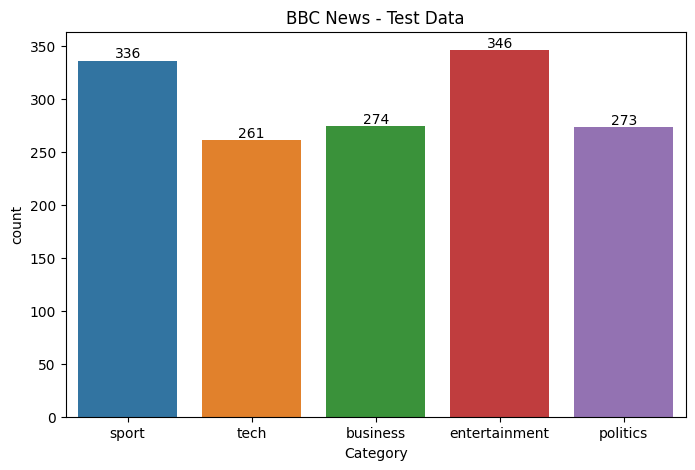

(1490, 3)


In [5]:
#df = df.drop(columns = ["ArticleId"] )
# Plot histogram
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Category')
plt.title("BBC News - Test Data")
plt.xlabel("Category")
plt.ylabel("Count")
ax = sns.countplot(x='Category', data=df)
plt.bar_label(ax.containers[0]) 
plt.xticks([0, 1,2,3,4], ['sport', 'tech','business','entertainment','politics'])
plt.show()
print(df.shape)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# vectorize
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df["Text"])

# Train K-means model
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X_train)

# Transform test data using same vectorizer
X_test = vectorizer.transform(dftest["Text"])

# Predict clusters 
test_clusters = kmeans.predict(X_test)

# map cluster nums to cat names
cat_map = {
    0: "entertainment",
    1: "business",
    2: "sport",
    3: "politics",
    4: "tech"
}

clusts = [cat_map[num] for num in test_clusters]
output = pd.DataFrame({'ArticleId': dftest["ArticleId"], 'Category': clusts})
#display(output.head())
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
